In [29]:
import skfuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:
df = pd.read_csv('data2.csv')

In [31]:
df.head()

,X,Y,Class
0,-0.842046,0.408155,0
1,0.096394,-0.852114,1
2,-0.964828,0.034454,0
3,-0.164699,0.817332,1
4,0.274231,0.756343,1


In [32]:
x = df['X'].to_numpy()
y = df['Y'].to_numpy()
labels = df['Class'].to_numpy()

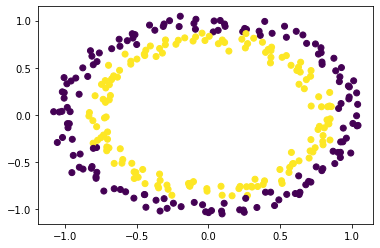

In [33]:
plt.scatter(x, y, c=labels)

In [34]:
# Reshape the array to a 2D array
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(x)
x_normal = scaler.transform(x)
scaler.fit(y)
y_normal = scaler.transform(y)

x_normal = np.ravel(x_normal)
y_normal = np.ravel(y_normal)

In [35]:
x_normal.shape

(300,)

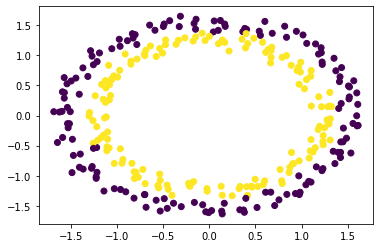

In [36]:
plt.scatter(x_normal, y_normal, c=labels)

In [37]:
df_norm = pd.DataFrame({
  'X' : x_normal,
  'Y' : y_normal
})
final_inp = np.array([df_norm['X'], df_norm['Y']])

In [38]:
final_inp.shape

(2, 300)

In [39]:
fpc_s = []
u_s = []
cntr_s = []
for i in range(2,11):
  num_clusters = i
  cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(final_inp, num_clusters, 2, error=0.005, maxiter=1000, init=None)
  fpc_s.append(fpc)
  u_s.append(u)
  cntr_s.append(cntr)

In [40]:
max_ind = np.argmax(np.array(fpc_s))
best_num_cluster = 2 + max_ind
best_fpc = fpc_s[max_ind]
print(f"best fpc is {best_fpc} which belongs to number of clusters equal to {best_num_cluster}")

best fpc is 0.7064717222211385 which belongs to number of clusters equal to 2


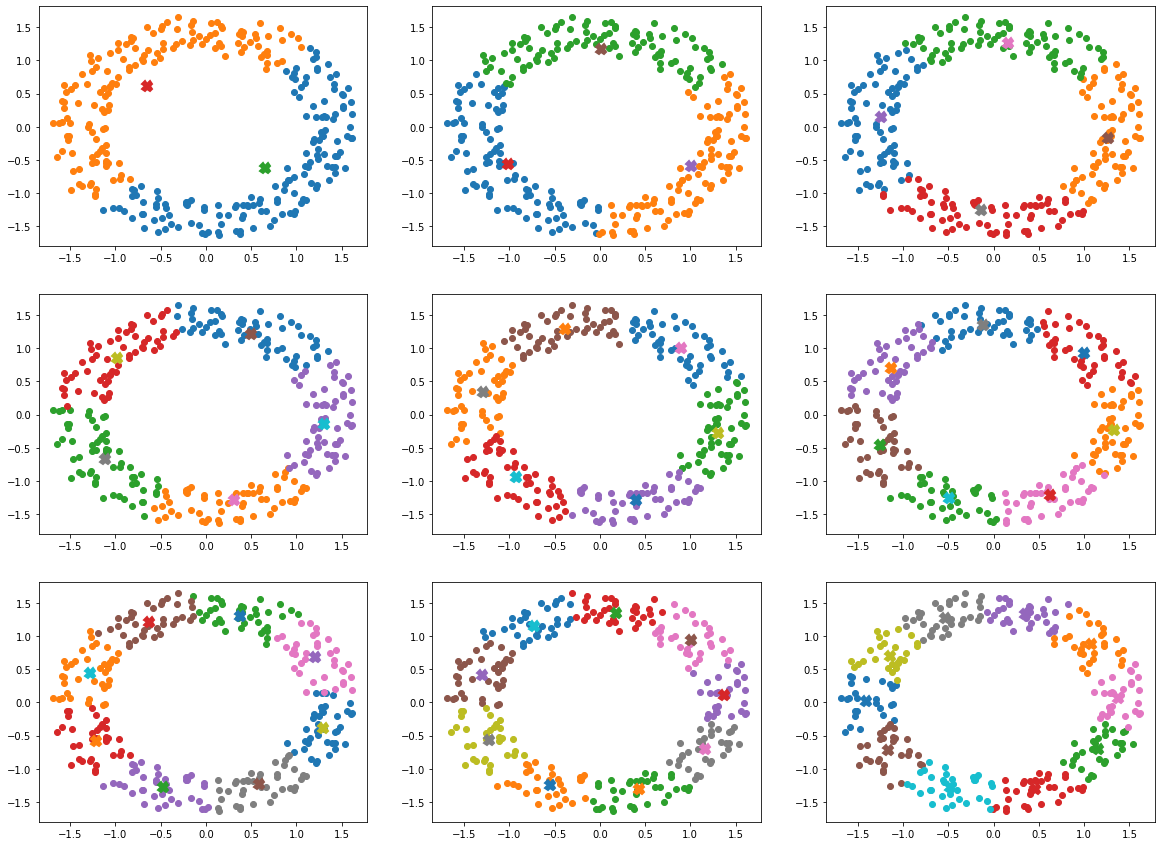

In [42]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

for ind, u in enumerate(u_s):
    num_clusters = ind + 2
    cluster_membership = np.argmax(u, axis=0)
    for i in range(num_clusters):
        axs[ind//3,ind%3].plot(x_normal[cluster_membership == i], y_normal[cluster_membership == i], 'o', label=f'Cluster {i + 1}')
for ind, cntr in enumerate(cntr_s):
    for cluster_center in cntr:
        axs[ind//3,ind%3].plot(cluster_center[0], cluster_center[1], 'X', markersize=10, markeredgewidth=2, label='Cluster Center')


plt.show()